1.Spatial Aggregation

In [16]:
import pandas as pd
import numpy as np
df=pd.read_csv('Data.csv')
df_filtered = df[['state', 'PM2.5']].dropna()
statewise_avg_PM25 = df_filtered.groupby('state').agg({'PM2.5': 'mean'})
highest_avg_PM25_state=statewise_avg_PM25['PM2.5'].idxmax()
highest_avg_PM25_value=np.max(statewise_avg_PM25)

print(f'State that has the highest average PM2.5 concentration across all stations and across all years is {highest_avg_PM25_state} with a value of {highest_avg_PM25_value}')

State that has the highest average PM2.5 concentration across all stations and across all years is Delhi with a value of 104.1009176780069


In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2023 = df[df['Timestamp'].dt.year == 2023]
df_hazardous=df_2023[df_2023['PM2.5']>300]
df_hazardous = df_hazardous.copy() 
df_hazardous['Date'] = df_hazardous['Timestamp'].dt.date
state_hazardous_days = df_hazardous.groupby('state')['Date'].nunique()
most_hazardous_state = state_hazardous_days.idxmax()
max_hazardous_days = state_hazardous_days.max()
print(f"State with the most hazardous PM2.5 days in 2023: {most_hazardous_state}")
print(f"Number of hazardous days: {max_hazardous_days}")


State with the most hazardous PM2.5 days in 2023: Delhi
Number of hazardous days: 49


In [36]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df_2023=df[df['Timestamp'].dt.year==2023]
df_var=df_2023.groupby('state').agg({'PM2.5':'var'})
highest_var_state=df_var['PM2.5'].idxmax()
print(f'The state with the highest variability is {highest_var_state}')

The state with the highest variability is Delhi


In [37]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df_covid=df[df['Timestamp'].dt.year.isin([2020,2021])]
df_avg_data=df_covid.groupby('state').agg({'PM2.5':'mean'})
df_leastavg=df_avg_data['PM2.5'].idxmin()
least_value = df_avg_data['PM2.5'].min() 

print(f'The state with the lowest average PM2.5 value during covid period is {df_leastavg} with an average of {least_value}')

The state with the lowest average PM2.5 value during covid period is Mizoram with an average of 14.323350150801287


2.Temporal Aggregation

In [17]:
import pandas as pd
df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

aug_2020 = df[(df["Timestamp"].dt.year == 2020) & (df["Timestamp"].dt.month == 8)]
max_pm25_value = aug_2020["PM2.5"].max()
max_pm25_row = aug_2020[aug_2020["PM2.5"] == max_pm25_value]

station_name = max_pm25_row.iloc[0]["station"]
print("Station with highest PM2.5 in August 2020:", station_name)
print("PM2.5 value:", max_pm25_value)

Station with highest PM2.5 in August 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5 value: 805.51


In [23]:
import pandas as pd
df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_2018 = df[(df["Timestamp"].dt.year == 2018) & (df["station"] == station_name)]

winter_mask = df_2018["Timestamp"].dt.month.isin([12, 1, 2])
summer_mask = df_2018["Timestamp"].dt.month.isin([3, 4, 5])
monsoon_mask = df_2018["Timestamp"].dt.month.isin([6, 7, 8, 9])

winter_avg = df_2018.loc[winter_mask, "PM2.5"].mean()
summer_avg = df_2018.loc[summer_mask, "PM2.5"].mean()
monsoon_avg = df_2018.loc[monsoon_mask, "PM2.5"].mean()

print("Seasonal Average PM2.5 Concentration in 2018 for", station_name)
print("Winter (Dec-Feb):", winter_avg, "µg/m³")
print("Summer (Mar-May):", summer_avg, "µg/m³")
print("Monsoon (Jun-Sep):", monsoon_avg, "µg/m³")

seasonal_avgs = {"Winter": winter_avg, "Summer": summer_avg, "Monsoon": monsoon_avg}
most_polluted_season = max(seasonal_avgs, key=seasonal_avgs.get)
print("Most polluted season:", most_polluted_season)

Seasonal Average PM2.5 Concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
Winter (Dec-Feb): 67.4923443634478 µg/m³
Summer (Mar-May): nan µg/m³
Monsoon (Jun-Sep): 34.42519611317571 µg/m³
Most polluted season: Winter


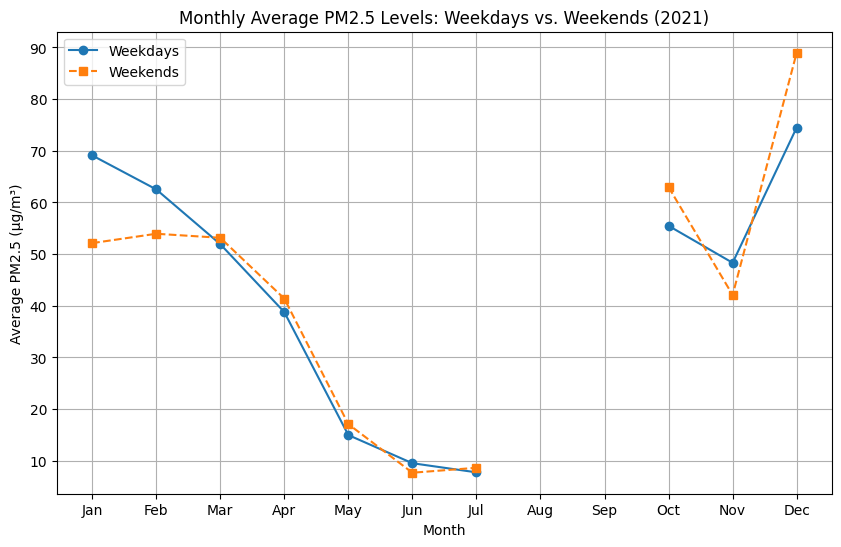

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])

station_name = "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"
df_2021 = df[(df["Timestamp"].dt.year == 2021) & (df["station"] == station_name)].copy()

df_2021["Weekday"] = df_2021["Timestamp"].dt.weekday
df_2021["Is_Weekend"] = df_2021["Weekday"] >= 5
df_2021["Month"] = df_2021["Timestamp"].dt.month
monthly_avg = df_2021.groupby(["Month", "Is_Weekend"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg[False], marker="o", linestyle="-", label="Weekdays")
plt.plot(monthly_avg.index, monthly_avg[True], marker="s", linestyle="--", label="Weekends")
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Monthly Average PM2.5 Levels: Weekdays vs. Weekends (2021)")
plt.legend()
plt.grid(True)
plt.show()

3.Spatio-temporal aggregation:

In [6]:
import pandas as pd
df=pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2022 = df[df['Timestamp'].dt.year == 2022]

df_summer = df_2022[df_2022['Timestamp'].dt.month.isin([3, 4, 5])]
df_monsoon = df_2022[df_2022['Timestamp'].dt.month.isin([6, 7, 8, 9])]

avg_summer = df_summer.groupby('state')['PM2.5'].mean()
avg_monsoon = df_monsoon.groupby('state')['PM2.5'].mean()

df_change = pd.DataFrame({'Summer_PM2.5': avg_summer, 'Monsoon_PM2.5': avg_monsoon})

df_change['Percentage_Change'] = ((df_change['Monsoon_PM2.5'] - df_change['Summer_PM2.5']) / df_change['Summer_PM2.5']) * 100

max_change_state = df_change['Percentage_Change'].abs().idxmax()
max_change_value = df_change['Percentage_Change'].loc[max_change_state]

print(f"State with the most difference in PM2.5: {max_change_state}")
print(f"Percentage change: {max_change_value:.2f}%")

State with the most difference in PM2.5: Assam
Percentage change: -61.18%


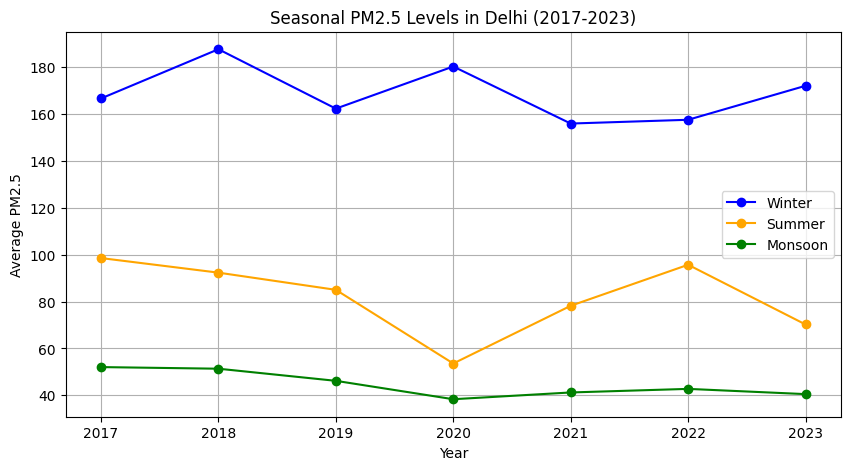

In [2]:
# Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_Delhi = df[df['state'] == 'Delhi']

years = range(2017, 2024)
seasons = {'Winter': [], 'Summer': [], 'Monsoon': []}

for i in years:
    df_i = df_Delhi[df_Delhi['Timestamp'].dt.year == i]
    df_winter = df_Delhi[((df_Delhi['Timestamp'].dt.month == 12) & (df_Delhi['Timestamp'].dt.year == i)) | 
                          ((df_Delhi['Timestamp'].dt.month <= 2) & (df_Delhi['Timestamp'].dt.year == i + 1))]
    df_summer = df_i[df_i['Timestamp'].dt.month.isin([3, 4, 5])]
    df_monsoon = df_i[df_i['Timestamp'].dt.month.isin([6, 7, 8, 9])]

    seasons['Winter'].append(df_winter['PM2.5'].mean())
    seasons['Summer'].append(df_summer['PM2.5'].mean())
    seasons['Monsoon'].append(df_monsoon['PM2.5'].mean())

plt.figure(figsize=(10, 5))
for season, color in zip(seasons.keys(), ['blue', 'orange', 'green']):
    plt.plot(years, seasons[season], marker='o', linestyle='-', color=color, label=season)

plt.xlabel("Year")
plt.ylabel("Average PM2.5")
plt.title("Seasonal PM2.5 Levels in Delhi (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

     
     

# We can clearly see that aveage PM2.5 values in delhi are varying from season to season, they are very high in winter mostly due to high smog levels and moderate in summer and least in monsoon due to rainfall and water vapour present in atmosphere.



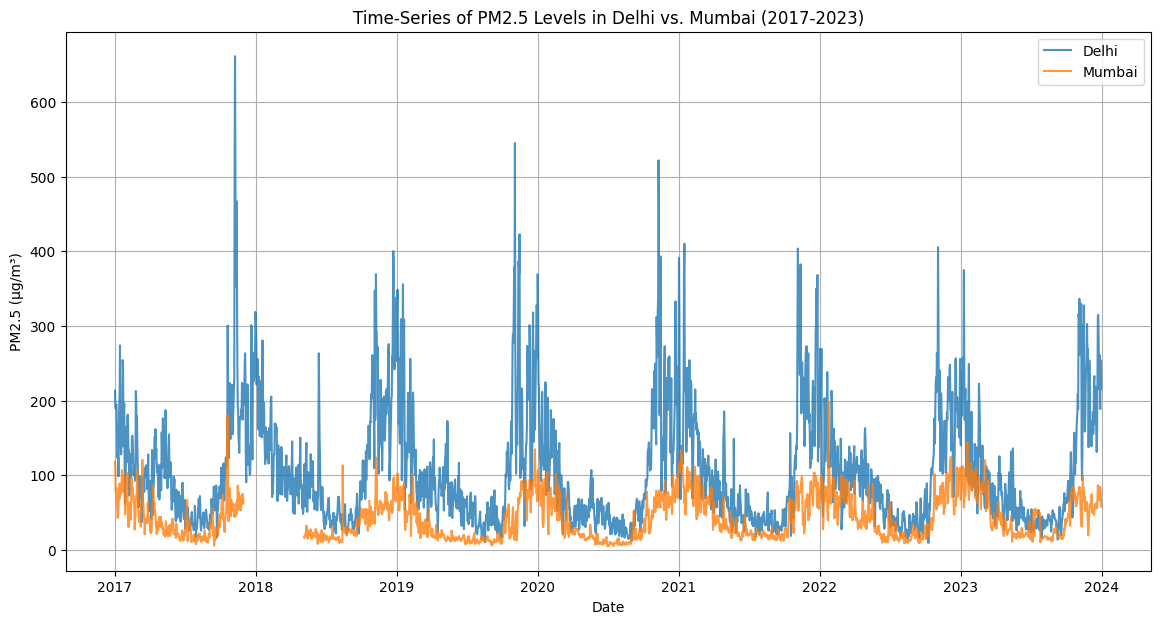

Delhi daily PM2.5 fluctuation (std. dev. of day-to-day changes): 37.117723473841664
Mumbai daily PM2.5 fluctuation (std. dev. of day-to-day changes): 12.230892839883543
Delhi had more fluctuations in PM2.5 levels from 2017 to 2023.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv", parse_dates=["Timestamp"])
df = df[(df["Timestamp"].dt.year >= 2017) & (df["Timestamp"].dt.year <= 2023)]
df_delhi = df[df["city"].str.strip().str.lower() == "delhi"]
df_mumbai = df[df["city"].str.strip().str.lower() == "mumbai"]

delhi_daily = df_delhi.groupby(df_delhi["Timestamp"].dt.date)["PM2.5"].mean().reset_index()
delhi_daily["Timestamp"] = pd.to_datetime(delhi_daily["Timestamp"])

mumbai_daily = df_mumbai.groupby(df_mumbai["Timestamp"].dt.date)["PM2.5"].mean().reset_index()
mumbai_daily["Timestamp"] = pd.to_datetime(mumbai_daily["Timestamp"])

plt.figure(figsize=(14, 7))
plt.plot(delhi_daily["Timestamp"], delhi_daily["PM2.5"], label="Delhi", alpha=0.8)
plt.plot(mumbai_daily["Timestamp"], mumbai_daily["PM2.5"], label="Mumbai", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.title("Time-Series of PM2.5 Levels in Delhi vs. Mumbai (2017-2023)")
plt.legend()
plt.grid(True)
plt.show()

delhi_daily = delhi_daily.sort_values("Timestamp")
mumbai_daily = mumbai_daily.sort_values("Timestamp")

delhi_daily["DayToDay_Change"] = delhi_daily["PM2.5"].diff()
mumbai_daily["DayToDay_Change"] = mumbai_daily["PM2.5"].diff()

delhi_fluctuation = delhi_daily["DayToDay_Change"].std()
mumbai_fluctuation = mumbai_daily["DayToDay_Change"].std()

print("Delhi daily PM2.5 fluctuation (std. dev. of day-to-day changes):", delhi_fluctuation)
print("Mumbai daily PM2.5 fluctuation (std. dev. of day-to-day changes):", mumbai_fluctuation)

if delhi_fluctuation > mumbai_fluctuation:
    print("Delhi had more fluctuations in PM2.5 levels from 2017 to 2023.")
elif mumbai_fluctuation > delhi_fluctuation:
    print("Mumbai had more fluctuations in PM2.5 levels from 2017 to 2023.")
else:
    print("Both cities had similar fluctuations in PM2.5 levels from 2017 to 2023.")


4.Population-Based

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv('Data.csv')
df2=pd.read_csv('State_data.csv')
df_1=df1.groupby('state').agg({'station':'count'})
df3=df2.sort_values(by='State',ascending=True)
df_new=df_1.merge(df3,left_on='state', right_on='State')
df_new['st/pop']=df_new['station']/df_new['Population']
highest_value=df_new['st/pop'].idxmax()
state_row=df_new.loc[highest_value]
state=state_row['State']
print(f'The state with the highest number of monitering stations per total population is {state}')

The state with the highest number of monitering stations per total population is Chandigarh


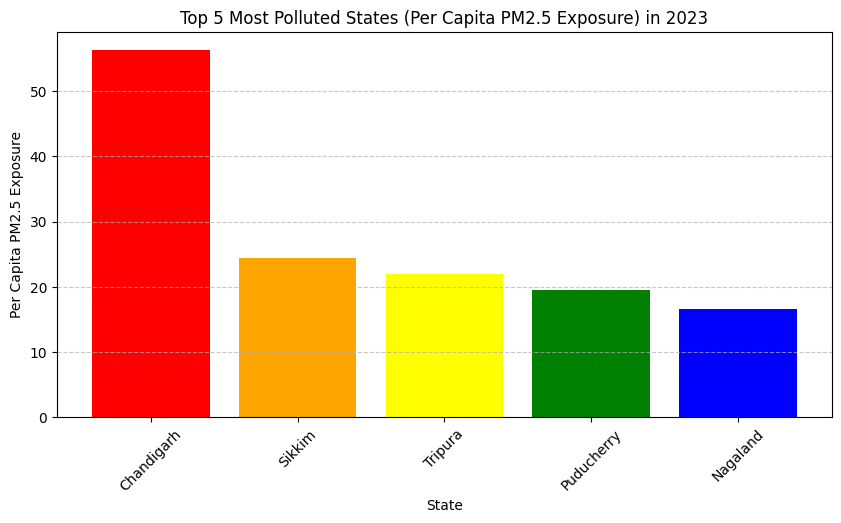

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
state_df = pd.read_csv('State_data.csv')
state_df.rename(columns={'State': 'state', 'Population': 'population'}, inplace=True)

df_2023 = df[df['Timestamp'].dt.year == 2023]
pm25_per_state = df_2023.groupby('state')['PM2.5'].mean().reset_index()
merged_pm25 = pm25_per_state.merge(state_df, on='state', how='left')
merged_pm25['pm25_per_capita'] = merged_pm25['PM2.5'] / (merged_pm25['population'] / 1e6)
top_5_polluted = merged_pm25.nlargest(5, 'pm25_per_capita')[['state', 'pm25_per_capita']]

colors = ['red', 'orange', 'yellow', 'green', 'blue']

plt.figure(figsize=(10, 5))
plt.bar(top_5_polluted['state'], top_5_polluted['pm25_per_capita'], color=colors)

plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure) in 2023")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

          

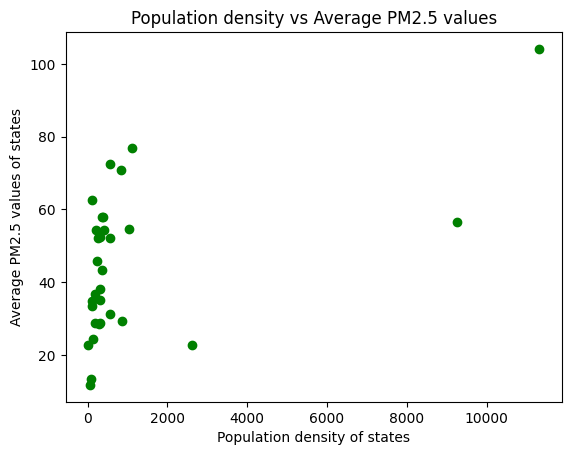

In [59]:

df2_new=df2.copy()
df2_new['p_d']=df2_new['Population']/df2_new['Area (km2)']
df2_new=df2_new.merge(df_statewise, left_on='State', right_on='state')
x=df2_new['p_d']
y=df2_new['PM2.5']
plt.scatter(x,y,color='g')
plt.xlabel('Population density of states')
plt.ylabel('Average PM2.5 values of states')
plt.title('Population density vs Average PM2.5 values')
plt.show()

5.Area Based

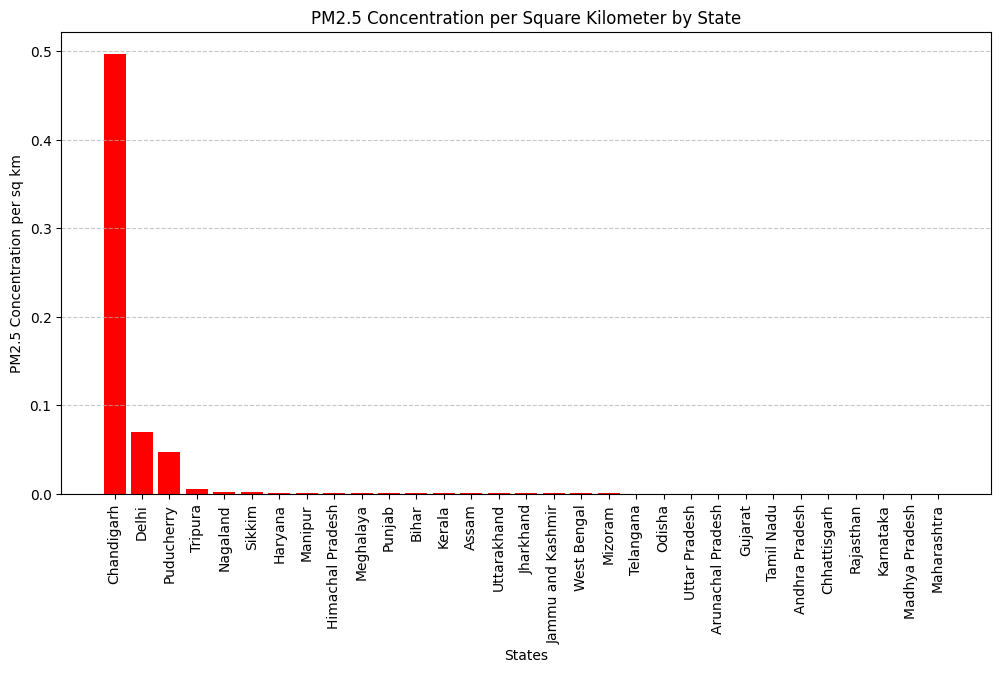

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df_data = pd.read_csv('Data.csv')
df_state = pd.read_csv('State_data.csv')

df_data['Timestamp'] = pd.to_datetime(df_data['Timestamp'])
df_avg_pm25 = df_data.groupby('state')['PM2.5'].mean().reset_index()

df_state.rename(columns={'State': 'state', 'Area (km2)': 'area_km2'}, inplace=True)
df_final = df_state.merge(df_avg_pm25, on='state', how='left')

df_final['pm25_per_sqkm'] = df_final['PM2.5'] / df_final['area_km2']
df_final = df_final.sort_values(by='pm25_per_sqkm', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_final['state'], df_final['pm25_per_sqkm'], color='red')

plt.xlabel('States')
plt.ylabel('PM2.5 Concentration per sq km')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [11]:
import pandas as pd

df_data = pd.read_csv('Data.csv')
df_state = pd.read_csv('State_data.csv')

df_avg_pm25 = df_data.groupby('state').agg({'PM2.5': 'mean'}).reset_index()
df_stations = df_data.groupby('state').agg({'station': 'count'}).reset_index()

df_state.rename(columns={'State': 'state', 'Area (km2)': 'area_km2'}, inplace=True)
df_merged = df_state.merge(df_avg_pm25, on='state', how='left').merge(df_stations, on='state', how='left')

df_merged['stations_per_sqkm'] = df_merged['station'] / df_merged['area_km2']
most_stations_state = df_merged.loc[df_merged['stations_per_sqkm'].idxmax(), 'state']

print(f'The state with the highest number of monitoring stations per sq km is {most_stations_state}.')


The state with the highest number of monitoring stations per sq km is Delhi.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Data.csv')
df_state=pd.read_csv('State_data.csv')
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df_2021=df[df['Timestamp'].dt.year==2021]
df_new=df_2021[(df_2021['state']=='Maharashtra' )| (df_2021['state']=='Madhya Pradesh')]
df_new=df_new.groupby('state').agg({'PM2.5':'mean'})
df_state['population_density']=df_state['Population']/df_state['Area (km2)']
df_k1=df_new.merge(df_state,left_on='state',right_on='State')
print(df_k1)


       PM2.5           State  Population  Area (km2)  population_density
0  47.095952  Madhya Pradesh    72626809      308252          235.608557
1  46.440044     Maharashtra   112374333      307713          365.192023


In [ ]:
# We can clearly see that, even though Madhya Pradesh's population density is less than Maharastra's, the PM2.5 concentration value is higher.





6.Funding Based

C:\Users\visha\AppData\Local\Temp\ipykernel_5620\1302519322.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021["Received_Funding"] = data_2021["state"].isin(funding_states)
C:\Users\visha\AppData\Local\Temp\ipykernel_5620\1302519322.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pm25_funding.index, y=avg_pm25_funding.values, palette=["red", "blue"])


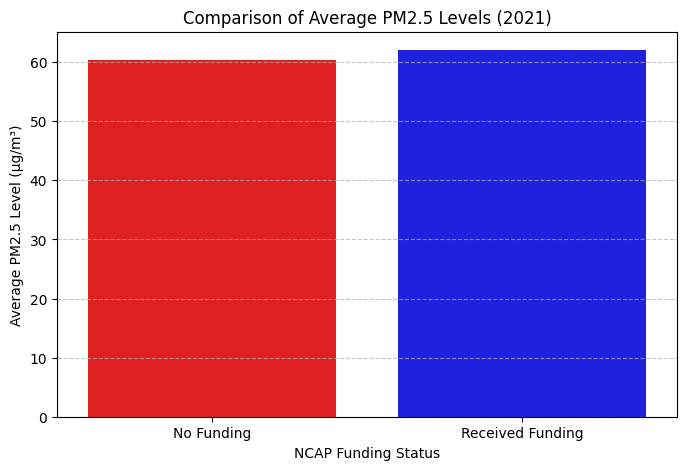

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_df = pd.read_csv("Data.csv")
funding_df = pd.read_csv("NCAP_Funding.csv")

data_df["Timestamp"] = pd.to_datetime(data_df["Timestamp"], errors="coerce")
data_df["Year"] = data_df["Timestamp"].dt.year
data_2021 = data_df[data_df["Year"] == 2021]

funding_states = funding_df["State"].unique()
data_2021["Received_Funding"] = data_2021["state"].isin(funding_states)

avg_pm25_funding = data_2021.groupby("Received_Funding")["PM2.5"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_pm25_funding.index, y=avg_pm25_funding.values, palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["No Funding", "Received Funding"])
plt.ylabel("Average PM2.5 Level (µg/m³)")
plt.xlabel("NCAP Funding Status")
plt.title("Comparison of Average PM2.5 Levels (2021)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



In [ ]:
# we can clearly see that states that got funded have PM2.5 concentrations slightly higher when compared to states that have no funds in FY 2021-22.

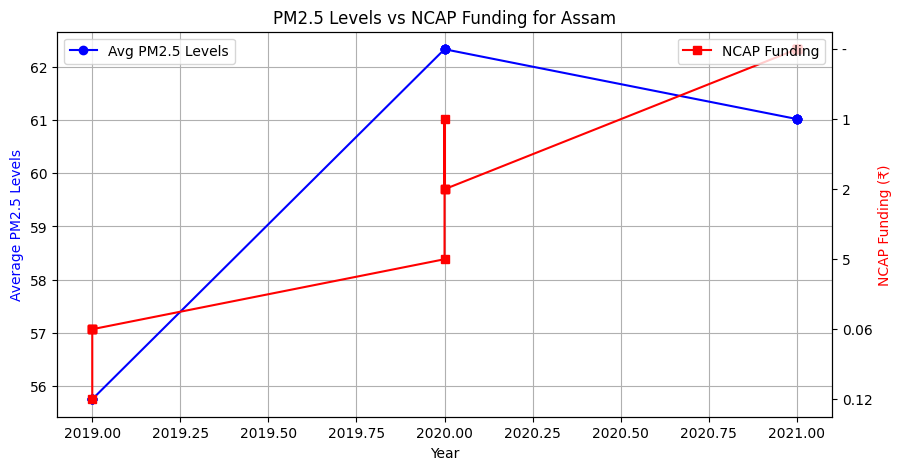

    Year      PM2.5  State Funding
0   2019  55.752773  Assam    0.12
1   2019  55.752773  Assam    0.06
2   2019  55.752773  Assam    0.06
3   2019  55.752773  Assam    0.06
4   2019  55.752773  Assam    0.06
5   2020  62.329410  Assam       5
6   2020  62.329410  Assam       2
7   2020  62.329410  Assam       1
8   2020  62.329410  Assam       2
9   2020  62.329410  Assam       2
10  2021  61.017780  Assam       -
11  2021  61.017780  Assam       -
12  2021  61.017780  Assam       -
13  2021  61.017780  Assam       -
14  2021  61.017780  Assam       -


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

air_quality_df = pd.read_csv('Data.csv', parse_dates=['Timestamp'])
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')  

air_quality_df = air_quality_df[(air_quality_df['state'] == 'Assam')]
ncap_funding_df = ncap_funding_df[ncap_funding_df['State'] == 'Assam']

air_quality_df['Year'] = air_quality_df['Timestamp'].dt.year
pm25_avg = air_quality_df.groupby('Year')['PM2.5'].mean().reset_index()
funding_years = [col for col in ncap_funding_df.columns if 'FY' in col]
ncap_funding = pd.melt(ncap_funding_df, id_vars=['State'], value_vars=funding_years, var_name='Year', value_name='Funding')
ncap_funding['Year'] = ncap_funding['Year'].str.extract('(\\d{4})').astype(float)
ncap_funding = ncap_funding.dropna()
merged_df = pd.merge(pm25_avg, ncap_funding, on='Year', how='inner')

twin_fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
ax1.plot(merged_df['Year'], merged_df['PM2.5'], 'b-o', label='Avg PM2.5 Levels')
ax2.plot(merged_df['Year'], merged_df['Funding'], 'r-s', label='NCAP Funding')

ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels', color='b')
ax2.set_ylabel('NCAP Funding (₹)', color='r')
ax1.set_title('PM2.5 Levels vs NCAP Funding for Assam')
ax1.grid()

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

print(merged_df)

In [ ]:
# This clearly shows that as funding increases still the PM2.5 values increases and decreased even though fundings decreased, this shows that
# funding is not only the key facotr here that plays important role in decreasing the PM2.5 values but there are others too.

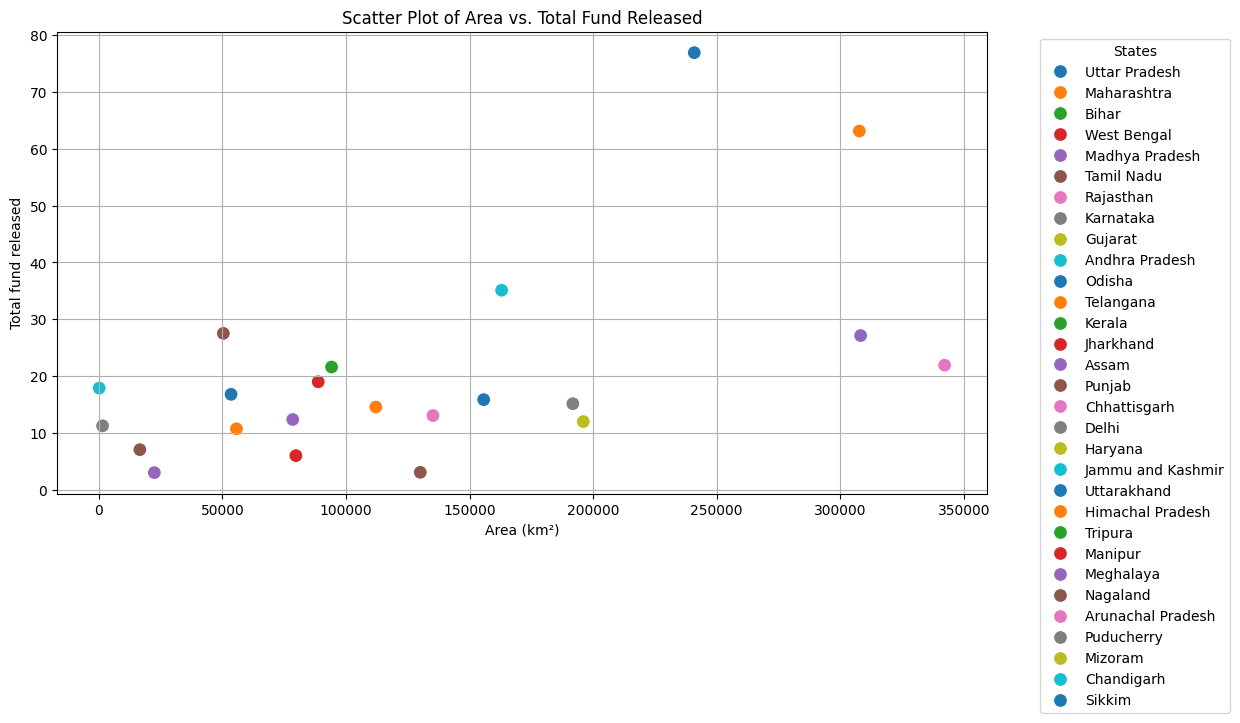

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_funding = pd.read_csv('NCAP_Funding.csv')
df_state = pd.read_csv('State_data.csv')

df_funding['Total fund released'] = pd.to_numeric(df_funding['Total fund released'], errors='coerce')
df_funding_grouped = df_funding.groupby('State', as_index=False)['Total fund released'].sum()

df_new = df_state.merge(df_funding_grouped, on='State', how='left')

x = df_new['Area (km2)']
y = df_new['Total fund released']
states = df_new['State']

plt.figure(figsize=(12, 6))
sns.scatterplot(x=x, y=y, hue=states, palette='tab10', s=100)

plt.legend(title="States", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Area (km²)')
plt.ylabel('Total fund released')
plt.title('Scatter Plot of Area vs. Total Fund Released')
plt.grid(True)
plt.show()



7.Miscellaneous Questions

In [91]:
import pandas as pd

df = pd.read_csv('Data.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_2023 = df[df['Timestamp'].dt.year == 2023]

most_polluted_city = df_2023.groupby('city')['PM2.5'].mean().idxmax()
df_city_2023 = df_2023[df_2023['city'] == most_polluted_city]
total_days = df_city_2023['Timestamp'].dt.date.nunique()
hazardous_days = df_city_2023[df_city_2023['PM2.5'] > 300]['Timestamp'].dt.date.nunique()

percentage_hazardous_days = (hazardous_days / total_days) * 100
print(f"Most polluted city in 2023: {most_polluted_city}")
print(f"Percentage of hazardous days (>300 µg/m³): {percentage_hazardous_days:.2f}%")


Most polluted city in 2023: Darbhanga
Percentage of hazardous days (>300 µg/m³): 0.82%


C:\Users\visha\AppData\Local\Temp\ipykernel_25728\1902805430.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['Year'] = df_delhi['Timestamp'].dt.year
C:\Users\visha\AppData\Local\Temp\ipykernel_25728\1902805430.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delhi['Month'] = df_delhi['Timestamp'].dt.month


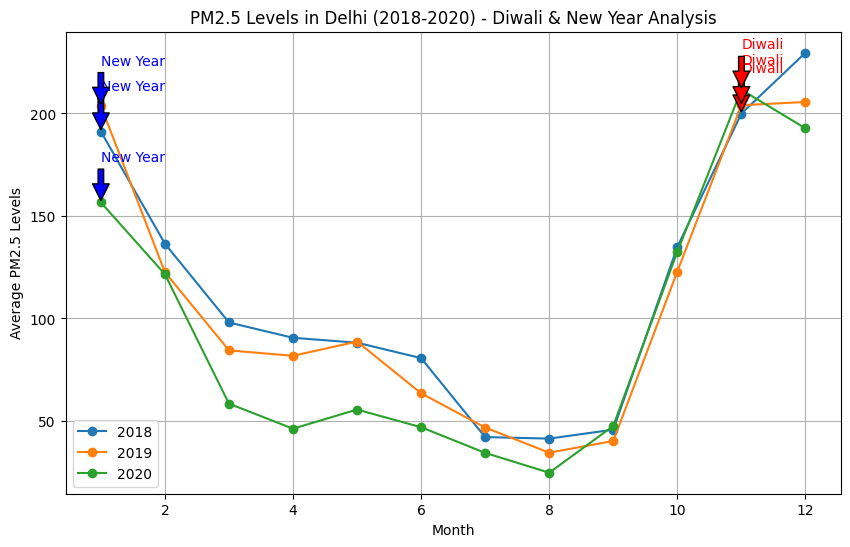

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df_delhi = df[df['city'].str.lower() == 'delhi']
df_delhi['Year'] = df_delhi['Timestamp'].dt.year
df_delhi['Month'] = df_delhi['Timestamp'].dt.month
df_avg_pm25 = df_delhi.groupby(['Year', 'Month'])['PM2.5'].mean().reset_index()
plt.figure(figsize=(10, 6))

for year in [2018, 2019, 2020]:
    data_year = df_avg_pm25[df_avg_pm25['Year'] == year]
    plt.plot(data_year['Month'], data_year['PM2.5'], marker='o', label=f"{year}")

    diwali_pm25 = data_year[data_year['Month'].isin([10, 11])]['PM2.5'].max()
    diwali_month = data_year[data_year['PM2.5'] == diwali_pm25]['Month'].values[0]
    
    new_year_pm25 = data_year[data_year['Month'] == 1]['PM2.5'].max()
    
    plt.annotate('Diwali', xy=(diwali_month, diwali_pm25), xytext=(diwali_month, diwali_pm25 + 20),
                 arrowprops=dict(facecolor='red', shrink=0.05), fontsize=10, color='red')

    plt.annotate('New Year', xy=(1, new_year_pm25), xytext=(1, new_year_pm25 + 20),
                 arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=10, color='blue')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 Levels')
plt.title('PM2.5 Levels in Delhi (2018-2020) - Diwali & New Year Analysis')
plt.legend()
plt.grid(True)
plt.show()


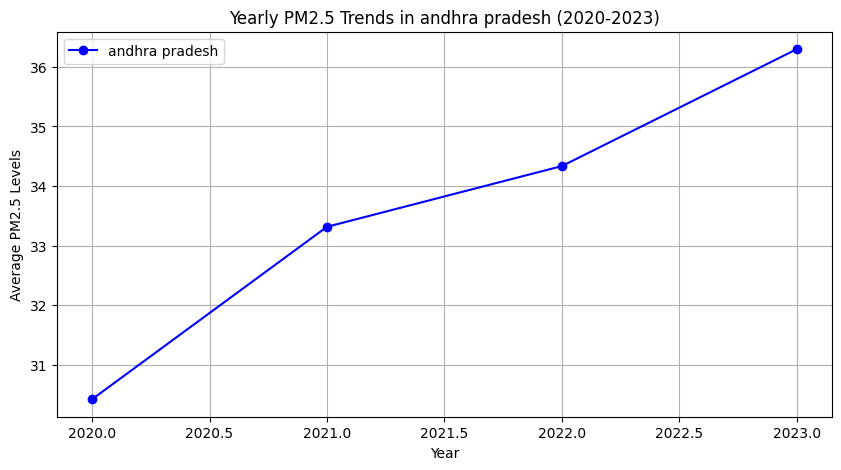

Highest NCAP funded state in 2020: andhra pradesh
   Year      PM2.5
3  2020  30.425130
4  2021  33.316491
5  2022  34.334527
6  2023  36.294259


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data.csv')
df_funding = pd.read_csv('NCAP_Funding.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['state'] = df['state'].str.lower().str.strip()
df_funding['State'] = df_funding['State'].str.lower().str.strip()

df_funding['Amount released during FY 2020-21'] = pd.to_numeric(df_funding['Amount released during FY 2020-21'], errors='coerce')
highest_funded_state = df_funding.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()

df_state = df[df['state'] == highest_funded_state].copy()
df_state['Year'] = df_state['Timestamp'].dt.year

df_avg_pm25 = df_state.groupby('Year')['PM2.5'].mean().reset_index()
df_avg_pm25 = df_avg_pm25[df_avg_pm25['Year'].between(2020, 2023)]

plt.figure(figsize=(10, 5))
plt.plot(df_avg_pm25['Year'], df_avg_pm25['PM2.5'], marker='o', linestyle='-', color='b', label=highest_funded_state)

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Levels')
plt.title(f'Yearly PM2.5 Trends in {highest_funded_state} (2020-2023)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Highest NCAP funded state in 2020: {highest_funded_state}")
print(df_avg_pm25)



C:\Users\visha\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


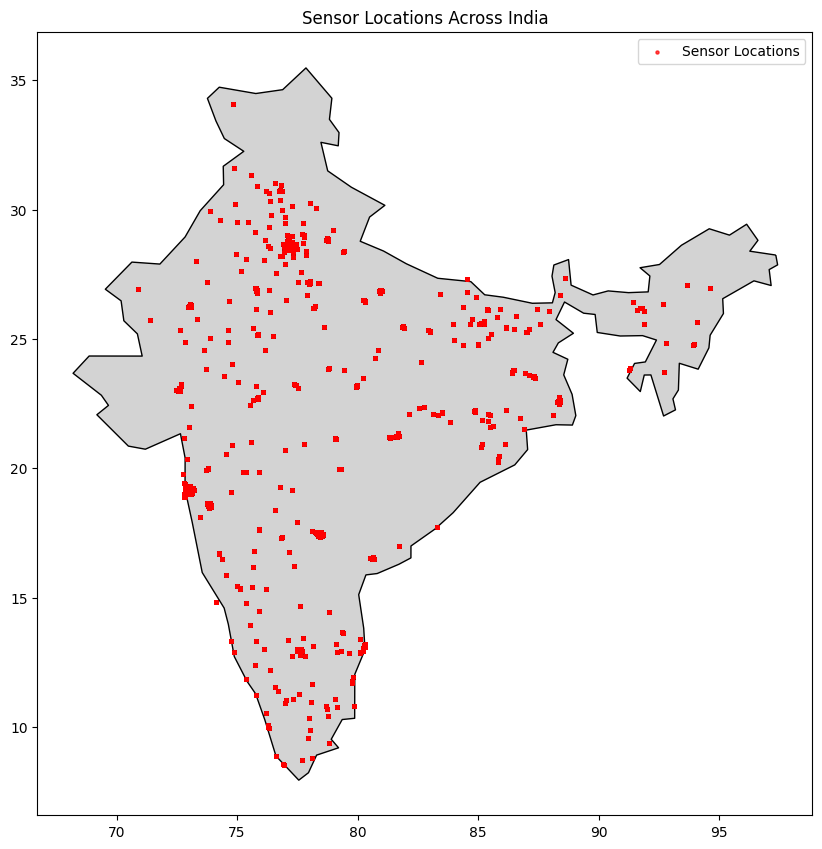

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

world = gpd.read_file(r"C:\Users\visha\Downloads\ne_110m_admin_0_countries")

india = world[world["ADMIN"] == "India"]
sensor_data = pd.read_csv("Data.csv")
if "latitude" in sensor_data.columns and "longitude" in sensor_data.columns:
    
    gdf_sensors = gpd.GeoDataFrame(
        sensor_data, 
        geometry=gpd.points_from_xy(sensor_data.longitude, sensor_data.latitude),
        crs="EPSG:4326"
    )

    
    fig, ax = plt.subplots(figsize=(10, 12))
    india.plot(ax=ax, color="lightgray", edgecolor="black")
    gdf_sensors.plot(ax=ax, color="red", markersize=5, alpha=0.7, label="Sensor Locations")

    
    plt.title("Sensor Locations Across India")
    plt.legend()
    plt.show()
else:
    print("Latitude and Longitude columns not found in Data.csv")


8.Something more interesting and unique to the policymakers:

Delhi experiences an extreme number of pollution events (PM2.5 > 500 µg/m³)

Delhi had 59 days with PM2.5 exceeding 500 µg/m³, far more than any other state.
Uttar Pradesh (49 days) and Haryana (41 days) follow, showing a need for stricter pollution emergency responses in these regions.
Winter pollution is drastically higher than monsoon pollution in multiple states

In Delhi, PM2.5 levels are 123.8 µg/m³ higher in winter than in monsoon, followed by Bihar (100.6 µg/m³ higher).
This suggests that winter conditions (such as temperature inversions and low wind speeds) trap pollutants, making seasonal interventions crucial.
Traffic congestion hotspots show significantly higher pollution

Delhi remains the worst traffic-polluted city (PM2.5 = 104.1 µg/m³), followed by Kolkata (51.2 µg/m³) and Mumbai (43.4 µg/m³).
This indicates that high vehicular density areas need urgent congestion mitigation policies like vehicle restrictions, better public transport, and electric mobility solutions. 


The code for the above calculations is given below.

In [20]:
import pandas as pd

df = pd.read_csv('Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date

extreme_pollution = df[df['PM2.5'] > 500].groupby('state')['Date'].nunique().sort_values(ascending=False)

winter = df[df['Timestamp'].dt.month.isin([12, 1, 2])].groupby('state')['PM2.5'].mean()
monsoon = df[df['Timestamp'].dt.month.isin([6, 7, 8, 9])].groupby('state')['PM2.5'].mean()
season_diff = (winter - monsoon).dropna().sort_values(ascending=False)

traffic_pollution = df.groupby('city')['PM2.5'].mean().sort_values(ascending=False).head(3)

print("Extreme Pollution Days:\n", extreme_pollution.head(3))
print("\nWinter vs Monsoon Difference:\n", season_diff.head(3))
print("\nTraffic Pollution Hotspots:\n", traffic_pollution)



Extreme Pollution Days:
 state
Delhi            59
Uttar Pradesh    47
Karnataka        41
Name: Date, dtype: int64

Winter vs Monsoon Difference:
 state
Delhi               123.816348
Bihar               100.631294
Himachal Pradesh     84.695124
Name: PM2.5, dtype: float64

Traffic Pollution Hotspots:
 city
Byrnihat     137.546358
Begusarai    119.810165
Delhi        104.100918
Name: PM2.5, dtype: float64
